In [1]:
##Nomor 1
print("Nim : 00000019999")
print("Nama : Stefanus Dwitra Lauwrendo")

Nim : 00000019999
Nama : Stefanus Dwitra Lauwrendo


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
#Nomor 2
dfread = pd.read_csv("go_track_track.csv")
dfread

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
0,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN
1,2,0,30.848229,0.171485,5.290,3,0,0,1,NaN
2,3,1,13.560101,0.067699,0.918,3,0,0,2,NaN
3,4,1,19.766679,0.389544,7.700,3,0,0,2,NaN
4,8,0,25.807401,0.154801,3.995,2,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...
158,38081,24,30.051732,0.218756,6.574,2,0,0,1,carro
159,38082,24,30.173788,0.255387,7.706,3,0,0,1,carro
160,38084,25,1.153772,0.013001,0.015,1,3,2,2,721 - CASTELO BRANCO SUISSA
161,38090,26,0.843223,0.007116,0.006,3,1,2,2,002 - FERNANDO COLLOR DIA


In [25]:
#Nomor 3
df=dfread.drop(columns = ['linha','id_android','id'])
df.head(5)

,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus
0,19.210586,0.138049,2.652,3,0,0,1
1,30.848229,0.171485,5.290,3,0,0,1
2,13.560101,0.067699,0.918,3,0,0,2
3,19.766679,0.389544,7.700,3,0,0,2
4,25.807401,0.154801,3.995,2,0,0,1


In [10]:
#Nomor 4
print("Features:{}".format(df.columns))

Features:Index(['speed', 'time', 'distance', 'rating', 'rating_bus', 'rating_weather',
       'car_or_bus'],
      dtype='object')


In [14]:
print("Shapes:{}".format(df.shape))

Shapes:(163, 7)


In [27]:
#Nomor 5
df = dfread.drop(columns = ['linha','id_android','id','car_or_bus'])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df, dfread['car_or_bus'], test_size=0.3 , random_state = 0)

In [29]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (114, 6)
y_train shape: (114,)
X_test shape: (49, 6)
y_test shape: (49,)


In [30]:
#Nomor 6
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
#Nomor 7
knn.predict(X_test)
print("Accuracy : {}".format(knn.score(X_test, y_test)))

Accuracy : 0.7346938775510204


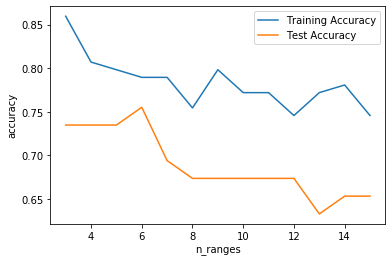

In [32]:
#Nomor 8
n_ranges = range(3,16)

training_accuracy = []
test_accuracy = []

for n in n_ranges:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(n_ranges, training_accuracy, label = "Training Accuracy")
plt.plot(n_ranges, test_accuracy, label = "Test Accuracy")
plt.xlabel("n_ranges")
plt.ylabel("accuracy")
plt.legend()

In [34]:
#Nomor 9
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
print("Accuracy : {}".format(knn.score(X_test, y_test)))

Accuracy : 0.7551020408163265


In [35]:
#Nomor 10
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print('Train Accuracy: {}'.format(dt.score(X_train, y_train)))
print('Test Accuracy: {}'.format(dt.score(X_test, y_test)))

Train Accuracy: 1.0
Test Accuracy: 0.8367346938775511


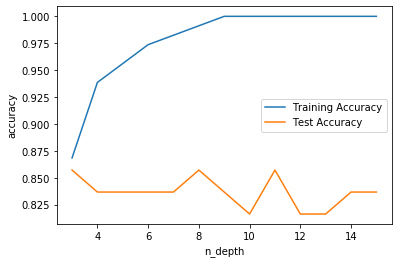

In [39]:
#Nomor 11
n_depth = range(3,16)

training_accuracy = []
test_accuracy = []

for n in n_depth:
    dt = DecisionTreeClassifier(max_depth=n)
    dt.fit(X_train, y_train)
    
    training_accuracy.append(dt.score(X_train, y_train))
    test_accuracy.append(dt.score(X_test, y_test))

plt.plot(n_ranges, training_accuracy, label = "Training Accuracy")
plt.plot(n_ranges, test_accuracy, label = "Test Accuracy")
plt.xlabel("n_depth")
plt.ylabel("accuracy")
plt.legend()

In [41]:
#Nomor 12 
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
print("Accuracy : {}".format(dt.score(X_test, y_test)))

Accuracy : 0.8571428571428571


In [64]:
#Nomor 13
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)
print("Training Accuracy: {}".format(mlpc.score(X_train, y_train)))
print("Test Accuracy: {}".format(mlpc.score(X_test, y_test)))

Training Accuracy: 0.7280701754385965
Test Accuracy: 0.7142857142857143


In [65]:
#Nomor 14
n_hidden = [1,150]
alpha = [0.001, 0.01, 0.1, 1]

training_accuracy = []
test_accuracy = []

for n in n_hidden:
    for a in alpha:
        mlpc = MLPClassifier(hidden_layer_sizes = (n,),
                            alpha=a, max_iter=200)
        mlpc.fit(X_train, y_train)
        print("Alpha :{}".format(a))
        print("Test Accuracy: {}".format(mlpc.score(X_test, y_test)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha :0.001
Test Accuracy: 0.5102040816326531
Alpha :0.01
Test Accuracy: 0.4897959183673469
Alpha :0.1
Test Accuracy: 0.673469387755102


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha :1
Test Accuracy: 0.5102040816326531
Alpha :0.001
Test Accuracy: 0.8571428571428571


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Alpha :0.01
Test Accuracy: 0.8367346938775511
Alpha :0.1
Test Accuracy: 0.8571428571428571
Alpha :1
Test Accuracy: 0.8571428571428571


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [63]:
#Nomor 15
gausnb = GaussianNB()
gausnb.fit(X_train , y_train)
print("Accuracy :{}".format(gausnb.score(X_test, y_test)))

Accuracy :0.8367346938775511
